In [45]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [46]:
data = pd.read_csv('/Users/omgajipara/Desktop/Data Science/AI:ML/Machine Learning/Supervised Learning/Regression/Simple_Linear_Regression/SimpleLinearRegression.csv')
data

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


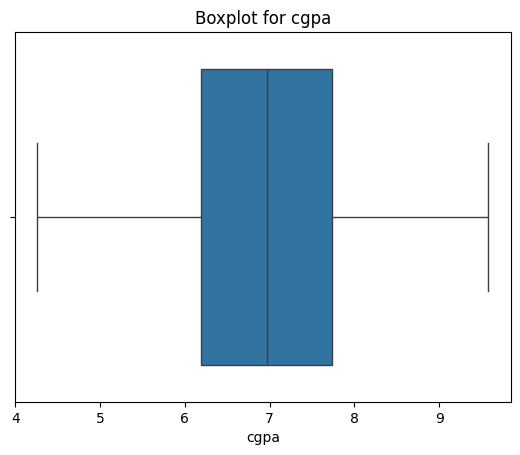

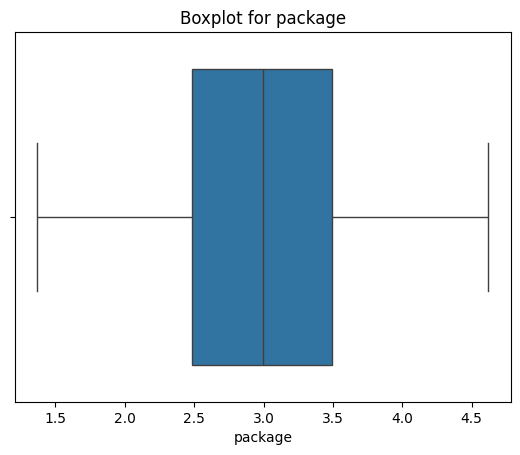

In [47]:
# Boxplot for all features
for i in data.columns:
    sns.boxplot(x=data[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

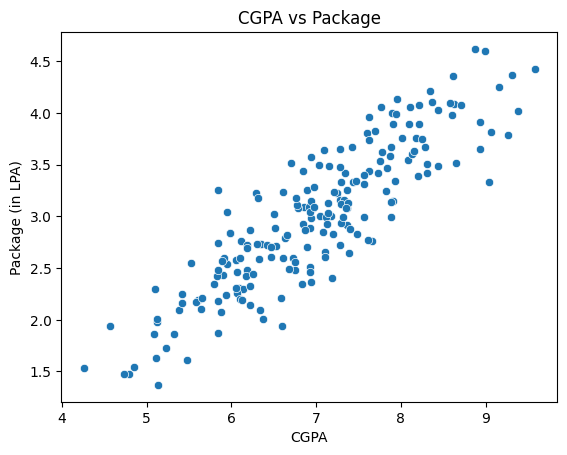

In [48]:
# Scatter plot between CGPA and Package
sns.scatterplot(x='cgpa', y='package', data=data)
plt.title('CGPA vs Package')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')
plt.show()


In [49]:
# Feature and target selection
x = data[['cgpa']]
y = data['package']

# Standardization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [50]:
for state in range(0, 101):
    X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=state)

    model = SVR(kernel='rbf')
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    diff = abs(train_acc - test_acc)

    if test_acc > best_score or (test_acc == best_score and diff < min_diff):
        best_score = test_acc
        best_state = state
        min_diff = diff

# Output best tuning results
print("✅ Best Random State:", best_state)
print(f"✅ Best Test Accuracy: {best_score*100:.2f}%")
print(f"✅ Min Train-Test Accuracy Diff: {min_diff:.4f}")

✅ Best Random State: 50
✅ Best Test Accuracy: 85.67%
✅ Min Train-Test Accuracy Diff: 0.0920


In [51]:
# Final training using best random state
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=best_state)
svm = SVR(kernel='rbf')
svm.fit(x_train, y_train)

SVR()

In [52]:

# Prediction on full data
y_pred = svm.predict(x_scaled)

In [53]:
# Evaluation
print("📈 R² Score:", r2_score(y, y_pred))
print("📉 MAE:", mean_absolute_error(y, y_pred))
print("📉 MSE:", mean_squared_error(y, y_pred))

📈 R² Score: 0.7808541631786206
📉 MAE: 0.2574212927560951
📉 MSE: 0.1043090129477919


In [54]:
# Prediction example
cgpa_value = 6.89
predicted_package = svm.predict(scaler.transform([[cgpa_value]]))
print(f"🎯 Predicted package for CGPA {cgpa_value}: ₹{predicted_package[0]:.2f} LPA")


🎯 Predicted package for CGPA 6.89: ₹2.91 LPA


/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


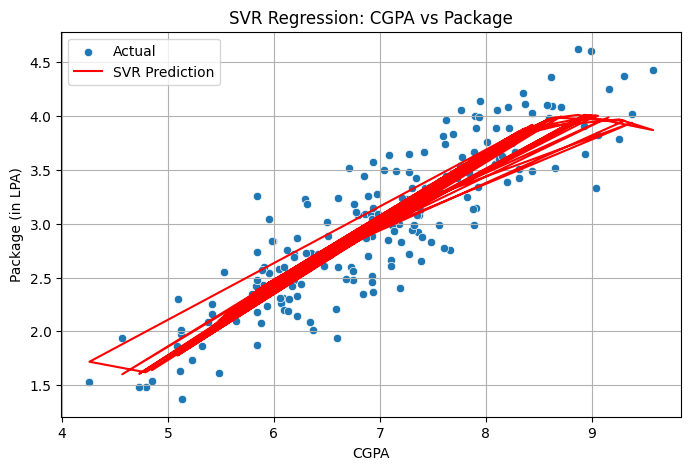

In [55]:
# Final visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x='cgpa', y='package', data=data, label='Actual')
plt.plot(data['cgpa'], y_pred, color='red', label='SVR Prediction')
plt.title("SVR Regression: CGPA vs Package")
plt.xlabel("CGPA")
plt.ylabel("Package (in LPA)")
plt.legend()
plt.grid(True)
plt.show()